In [98]:
import numpy as np
import numpy.linalg as la
import cv2
import sys

import matplotlib.pyplot as plt

In [54]:
from main import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
points1 = [(0,0), (0,1)]
points2 = [(1,0), (1,1)]

In [56]:
computeH(points1, points2)

array([[ 1.11022302e-16, -4.44089210e-16,  1.11022302e-16],
       [ 4.93038066e-32,  3.33333333e-01,  4.93038066e-32],
       [-3.33333333e-01, -3.33333333e-01,  1.00000000e+00]])

In [57]:
from pathlib import Path
SAMPLE_NUMBER = 1
image_dir = Path(f'./samples/{SAMPLE_NUMBER}')
COORDS = np.load(image_dir/'points.npy')
IMAGES = [x for x in image_dir.iterdir() if x.suffix == ".jpg"]

In [58]:
im1_pts = COORDS[:, 0, :]
im2_pts = COORDS[:, 1, :]
im1_pts, im2_pts

(array([[2564, 1982],
        [2917, 1979],
        [2576, 2274],
        [2928, 2274],
        [2238, 1432],
        [2553,  613],
        [3100, 1259],
        [1992,  823]]),
 array([[ 871, 2296],
        [1159, 2280],
        [ 869, 2547],
        [1156, 2528],
        [ 581, 1817],
        [ 872, 1099],
        [1302, 1679],
        [ 363, 1253]]))

In [59]:
H = computeH(im1_pts, im2_pts)
H

array([[ 7.93089121e-01, -7.52075515e-03,  1.62018762e+03],
       [-1.53539534e-01,  1.01626585e+00, -4.31947299e+02],
       [-1.02620609e-04, -8.05275598e-06,  1.00000000e+00]])

(4000, 6000)


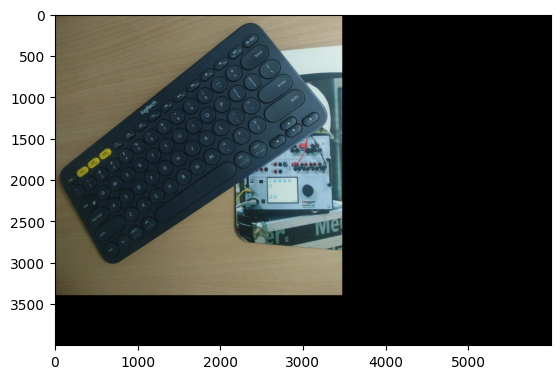

In [60]:
# image 1
image1 = cv2.imread(str(IMAGES[0]))
resized_img1 = np.zeros((4000, 6000, 3), dtype=np.uint8)
resized_img1[:image1.shape[0], :image1.shape[1], :] = image1
image1 = cv2.cvtColor(resized_img1, cv2.COLOR_BGR2RGB)
mask1 = np.any(image1 != [0, 0, 0], axis=2)
print(mask1.shape)
plt.imshow(image1)

In [12]:
def get_bounding_box(image, H):
    # get all corners
    corners = np.array([
        [0, 0, 1],
        [image.shape[1], 0, 1],
        [0, image.shape[0], 1],
        [image.shape[1], image.shape[0], 1],
    ]).T

    display(corners)

    # transform corners
    corners = H @ corners

    # normalize: x/w, y/w
    corners = corners / corners[2]

    # get bounding box
    min_x = int(np.min(corners[0]))
    max_x = int(np.max(corners[0]))
    min_y = int(np.min(corners[1]))
    max_y = int(np.max(corners[1]))
    return (min_x, max_x, min_y, max_y)

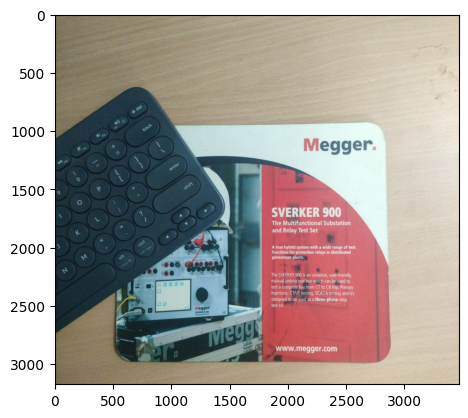

In [61]:
im2 = cv2.imread(str(IMAGES[1]))
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
plt.imshow(im2)

In [99]:
corners = np.array([
    [0, 0, 1],
    [im2.shape[1], 0, 1],
    [0, im2.shape[0], 1],
    [im2.shape[1], im2.shape[0], 1],
])
corners[:, :2] = corners[:, :2] + 1500

display(corners)
display(corners.shape)

# make a very big canvas and place the image at its center
resized_img2 = np.zeros((7000, 7000, 3), dtype=np.uint8)
# place image in the center of the canvas
resized_img2[1500:1500+im2.shape[0], 1500:1500+im2.shape[1], :] = im2
# img2 = cv2.cvtColor(resized_img1, cv2.COLOR_BGR2RGB)
plt.imshow(resized_img2)
plt.plot(corners.T[0], corners.T[1], 'ro')

array([[1500, 1500,    1],
       [4968, 1500,    1],
       [1500, 4674,    1],
       [4968, 4674,    1]])

(4, 3)

In [97]:
corners = np.array([
    [0, 0, 1],
    [im2.shape[1], 0, 1],
    [0, im2.shape[0], 1],
    [im2.shape[1], im2.shape[0], 1],
])

corners[:, :2] = corners[:, :2] + 1500
display(corners)
display(corners.shape)

array([[1500, 1500,    1],
       [4968, 1500,    1],
       [1500, 4674,    1],
       [4968, 4674,    1]])

(4, 3)

In [100]:
display(corners.T)
new_corners = H @ corners.T
display(new_corners)
# divide each column by its last element
new_corners = new_corners / new_corners[-1]
display(new_corners)

array([[1500, 4968, 1500, 4968],
       [1500, 1500, 4674, 4674],
       [   1,    1,    1,    1]])

array([[2.79854017e+03, 5.54897324e+03, 2.77466929e+03, 5.52510236e+03],
       [8.62142180e+02, 3.29667078e+02, 4.08777000e+03, 3.55529489e+03],
       [8.33989952e-01, 4.78101680e-01, 8.08430505e-01, 4.52542233e-01]])

array([[3.35560418e+03, 1.16062617e+04, 3.43216798e+03, 1.22090315e+04],
       [1.03375608e+03, 6.89533401e+02, 5.05642720e+03, 7.85627205e+03],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [101]:
output_size = (12000, 10000)
output = cv2.warpPerspective(resized_img2, H, output_size, flags=cv2.INTER_LINEAR)
plt.imshow(output)
display(new_corners.T)

plt.plot(new_corners.T[1], new_corners.T[0], 'ro')

array([[3.35560418e+03, 1.03375608e+03, 1.00000000e+00],
       [1.16062617e+04, 6.89533401e+02, 1.00000000e+00],
       [3.43216798e+03, 5.05642720e+03, 1.00000000e+00],
       [1.22090315e+04, 7.85627205e+03, 1.00000000e+00]])

: 

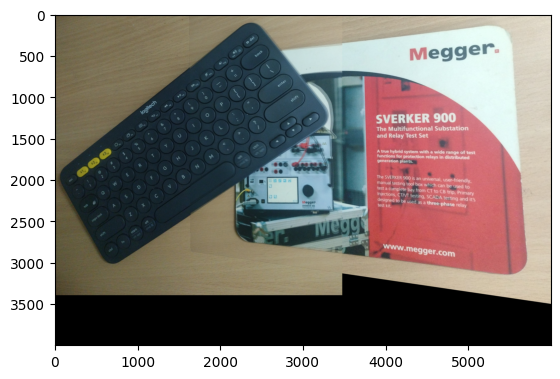

In [67]:
final = np.zeros_like(output)
AND_MASK = np.logical_and(mask1, mask2)
final[AND_MASK] = cv2.addWeighted(image1, 0.5, output, 0.5, 0)[AND_MASK]
mask1_alone = np.logical_and(mask1, np.logical_not(mask2))
mask2_alone = np.logical_and(mask2, np.logical_not(mask1))
final[mask1_alone] = image1[mask1_alone]
final[mask2_alone] = output[mask2_alone]
plt.imshow(final)